In [1]:
from getdist import loadMCSamples,MCSamples
from getdist import plots
import getdist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
jla_root = "/home/manvendra/post_doc_ahduni/sim/monte_python/montepython_public/chains/neg_omg/iucaa_spt_chains/spt3gplus/getdist/rem_"
#bao_root = "/home/zer0/0/class/montepython_public-3.3/chains/tach_edits/get_dist/exp/bao_run2/rem_"
#cmb_o_root = "/home/zer0/0/class/montepython_public-3.3/chains/tach_edits/get_dist/exp/cmb_only/loc_"
#cmb_bao_root = "/home/zer0/0/class/montepython_public-3.3/chains/tach_edits/get_dist/exp/cmb_bao/loc_"


In [3]:
jla_smp = loadMCSamples(jla_root, settings={'ignore_rows':0.3}) 
#bao_smp = loadMCSamples(bao_root, settings={'ignore_rows':0.3}) 
#cmb_o_smp = loadMCSamples(cmb_o_root, settings={'ignore_rows':0.3})
#cmb_bao_smp = loadMCSamples(cmb_bao_root, settings={'ignore_rows':0.3})


In [4]:
p = jla_smp.getParams()
jla_smp.addDerived(p.H0/100.0, name='h', label='h')
p = jla_smp.getParams()
jla_smp.addDerived(p.omega_cdm/(p.h*p.h), name='Omega_cdm', label='\Omega_{cdm}')
jla_smp.addDerived(p.omega_b/(p.h*p.h), name='Omega_b', label='\Omega_{b}')
p = jla_smp.getParams()
jla_smp.addDerived(1.0-(p.Omega_cdm+p.Omega_b+p.Omega_fld), name='Omega_Lambda', label='\Omega_{\Lambda}')


((62.894636653956155, 70.44196334604385),
 (0.737580167981417, 0.853276332018583))

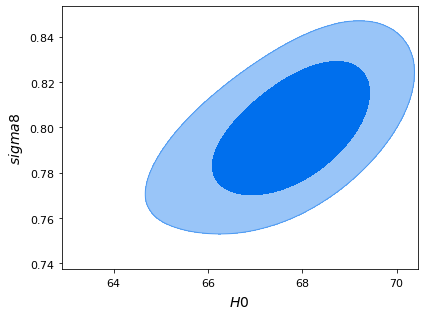

In [5]:
g = plots.get_single_plotter()
g.plot_2d(jla_smp, ['H0', 'sigma8'],filled=True)
#g.export('omega_alpha.pdf')

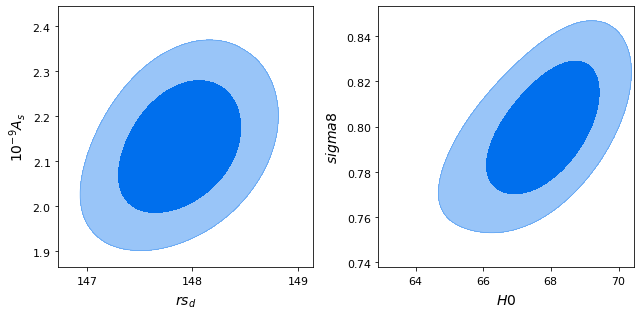

In [6]:
g = plots.get_subplot_plotter(subplot_size=4.5)
g.settings.scaling = False 
g.plots_2d(jla_smp, param_pairs=[['rs_d','A_s'], ['H0', 'sigma8']],nx=2, filled=True)

g.export('rs_d_w0_fld_vaa_H0_sigma8_2d.pdf')

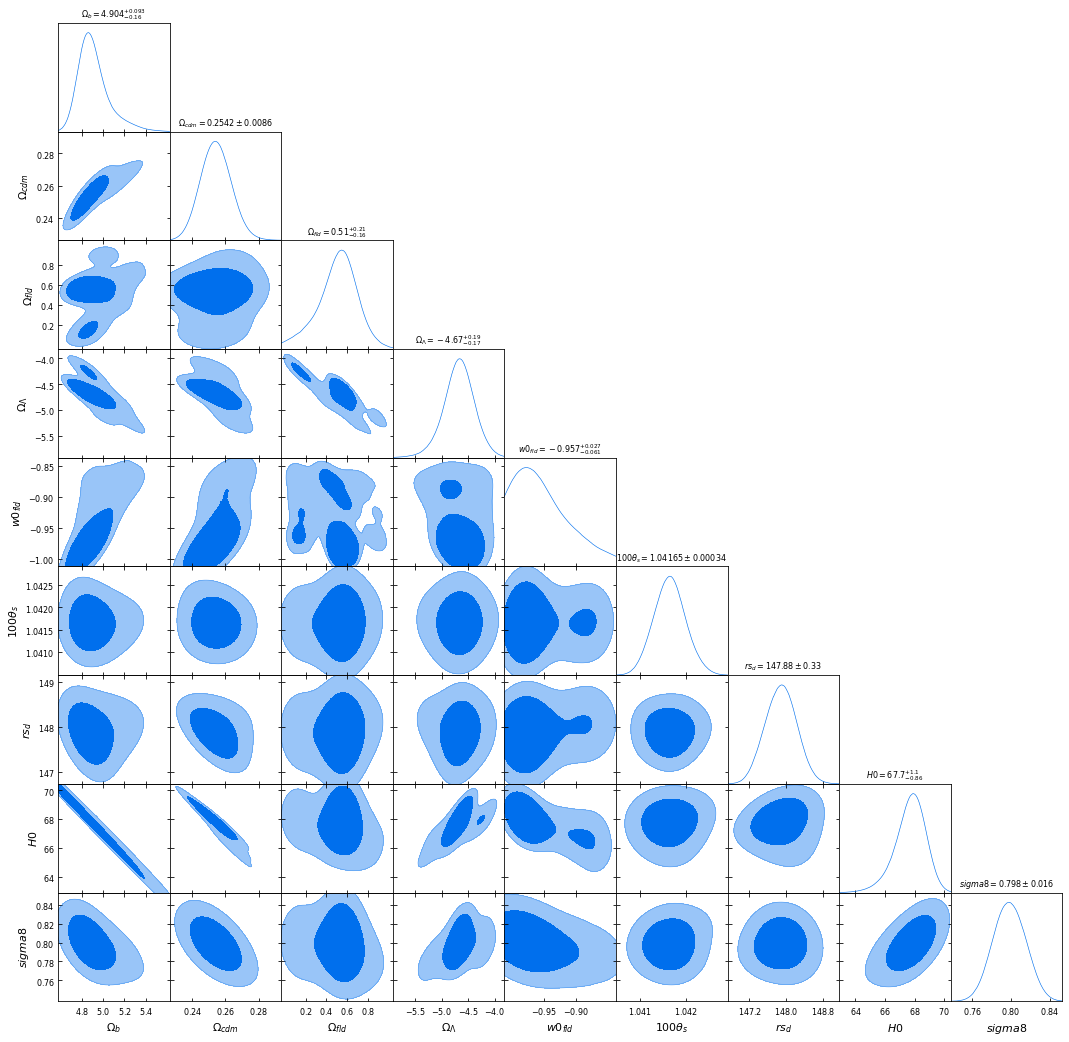

In [10]:
gt = plots.get_subplot_plotter()

gt.triangle_plot(jla_smp,['Omega_b', 'Omega_cdm','Omega_fld','Omega_Lambda','w0_fld', '100theta_s','rs_d','H0', 'sigma8'], filled=True,title_limit=1)
gt.export('triangle.pdf')

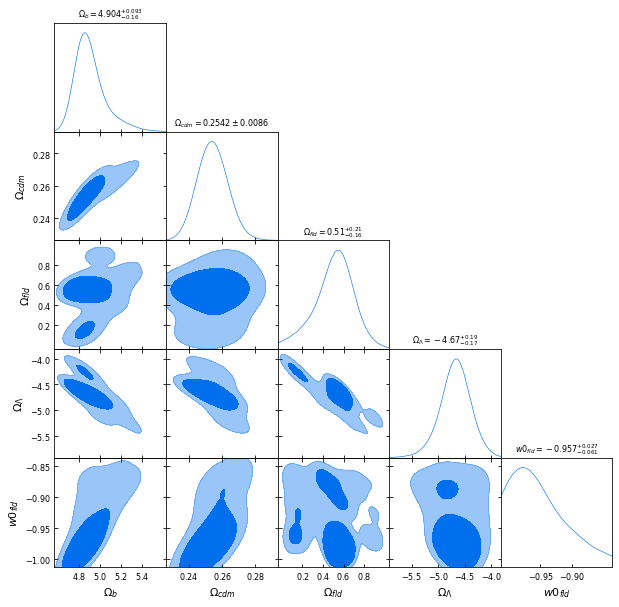

In [11]:
gt = plots.get_subplot_plotter()
0
gt.triangle_plot(jla_smp,['Omega_b', 'Omega_cdm','Omega_fld','Omega_Lambda','w0_fld'], filled=True,title_limit=1)
gt.export('triangle_2.pdf')

In [ ]:
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_1d(exp, 'h', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels,normalized=True)
g.add_x_marker(0.6766,color="red")
#g.add_y_marker(0.311,color="red")
g.add_legend(exp_labels,legend_loc='upper left');
g.export("exp_h")

In [ ]:
g = plots.get_single_plotter()
jla_smp.updateSettings({'contours': [0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 3
g.plot_2d(jla_smp, 'log10nrec_alpha', 'Omega_fld',filled=True);

In [ ]:
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_1d(exp, 'w0', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels)
g.add_x_marker(0.6766,color="red")
#g.add_y_marker(0.311,color="red")
g.add_legend(exp_labels,legend_loc='upper left');
g.export("exp_w0")
print(exp[3].getInlineLatex('w0',limit=1))

In [ ]:
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.title_limit_fontsize = 14
g.triangle_plot(exp, [ 'Omega_cdm','h','log10_tach_exp_phi_a',"w0"],contour_colors=['red','cyan', 'blue','green'],filled=True,title_limit=2,legend_labels=exp_labels)
#g.add_legend(, colored_text=True);
g.export("exp_traingle_cmb_cmb_o_bao_jla")

In [ ]:
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.title_limit_fontsize = 14
g.triangle_plot(exp[:2], [ 'Omega_cdm','h','sigma8'],contour_colors=['green','red'],filled=True,title_limit=2,legend_labels=exp_labels[:2],markers={'sigma8':0.8102})
#g.add_legend(, colored_text=True);
g.export("exp_traingle_cmb_cmb_o_s8")

In [ ]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp, 'h', 'Omega_cdm', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels)
g.add_x_marker(0.6766,color="red")
g.add_y_marker(0.311,color="red")
g.add_legend(exp_labels,legend_loc='lower left');
g.export("exp_omegacdm_h")

# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp[2:], 'h', 'Omega_cdm', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels[2:])
g.add_x_marker(0.6766,color="red")
g.add_y_marker(0.311,color="red")
g.add_legend(exp_labels[2:],legend_loc='lower left');
g.export("exp_omegacdm_h_cmb")

In [ ]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp, 'h', 'w0', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels)
g.add_legend(exp_labels,legend_loc='upper left');
g.export("exp_h_w0")

In [ ]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp, 'Omega_cdm','w0', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels)
g.add_legend(exp_labels,legend_loc='upper left');
g.export("exp_omegacdm_w0")

In [ ]:
k = plots.get_subplot_plotter()
k.settings.figure_legend_frame = False
k.settings.alpha_filled_add=0.4
k.settings.title_limit_fontsize = 14
k.triangle_plot(exp[2:], [ 'Omega_cdm','h','log10_tach_exp_phi_a',"w0"],contour_colors=['green',"red"],filled=True,title_limit=1,legend_labels=exp_labels[2:])
#g.add_legend(, colored_text=True);
k.export("exp_traingle_cmb_cmb_bao")

In [ ]:
k = plots.get_subplot_plotter()
k.settings.figure_legend_frame = False
k.settings.alpha_filled_add=0.4
k.settings.title_limit_fontsize = 14
k.triangle_plot(exp[:2], [ 'Omega_cdm','h','log10_tach_exp_phi_a',"w0"],contour_colors=['green',"red"],filled=True,title_limit=1,legend_labels=exp_labels[:2])
#g.add_legend(, colored_text=True);
k.export("exp_traingle_jla_bao")

In [ ]:
k = plots.get_subplot_plotter()
k.settings.figure_legend_frame = False
k.settings.alpha_filled_add=0.4
k.settings.title_limit_fontsize = 14
k.triangle_plot(exp[0], [ 'Omega_cdm','h','log10_tach_exp_phi_a',"w0"],contour_colors=['green',"red","blue","magenta"],filled=True,title_limit=1,legend_labels=exp_labels[0])
#g.add_legend(, colored_text=True);
k.export("exp_traingle_jla")

In [ ]:
k = plots.get_subplot_plotter()
k.settings.figure_legend_frame = False
k.settings.alpha_filled_add=0.4
k.settings.title_limit_fontsize = 14
k.triangle_plot(exp[1], [ 'Omega_cdm','h','log10_tach_exp_phi_a',"w0"],contour_colors=['green',"red","blue","magenta"],filled=True,title_limit=1,legend_labels=exp_labels[1])
k.add_legend(exp_labels[1], colored_text=True);
k.export("exp_traingle_bao")

In [ ]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp, 'log10_tach_exp_phi_a','w0', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels)
g.add_legend(exp_labels,legend_loc='upper left');
g.export("exp_phi_a_w0")

In [ ]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=4 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d(exp[2:], 'log10_tach_exp_phi_a','w0', filled=True, 
    colors=['green', 'blue','red','cyan'],legend_labels=exp_labels[2:])
g.add_legend(exp_labels[2:],legend_loc='upper right');
g.export("exp_phi_a_w0_cmb_only")